In [1]:
import numpy as np
import scipy as sc
import opt_einsum as oe
from sys import getsizeof

a = np.random.rand(5)
print(a.shape,getsizeof(a))
a = a[np.newaxis,:,np.newaxis]
print(a.shape,getsizeof(a))
print(a)
print(np.zeros((1,5,1)))

(5,) 136
(1, 5, 1) 128
[[[ 0.56417186]
  [ 0.32543807]
  [ 0.61352298]
  [ 0.90632631]
  [ 0.22683989]]]
[[[ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]]]


In [71]:
import numpy as np
from scipy.linalg import svd
import scipy.sparse as ss
from scipy.sparse.linalg import svds

#a = np.zeros((20,1000),complex)
#a += np.random.rand(20,1000)
#a+= 1j*np.random.rand(20,1000)
#print(a.shape)
def conv(x):
    return x.replace('+-', '-').encode()

a = np.genfromtxt((conv(x) for x in open("./mat.txt")),dtype=complex)[:,:]
#a = np.random.rand(90,10000)
print(a.shape)
res1 = svd(a,full_matrices=False)
#print(res1)
b = ss.csc_matrix(a)
#print(b)
lim = 10
#start = np.concatenate((np.array([1,]),np.zeros(lim-1)),axis=0).reshape(1,10)[0,:]
print(start)
res = svds(b,k=lim,maxiter=1000000)
print(np.einsum("ij,jk->ik",np.einsum("ij,j->ij",res[0],res[1]),res[2])[1,0])
print(np.einsum("ij,jk->ik",np.einsum("ij,j->ij",res1[0],res1[1]),res1[2])[1,0])
print(res[1]-res1[1][:lim])
print(res[1])

(81, 11767)
[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
(-3.8603134184e-15+0.445557520933j)
(-3.75798870878e-15+0.445557520927j)
[  0.00000000e+00   4.99600361e-16  -4.16333634e-17   4.16333634e-17
   1.04083409e-17  -1.73472348e-18   6.50521303e-19  -6.39958464e-15
  -4.66746880e-06  -9.43119507e-07]
[  9.06490196e-01   4.11696612e-01   7.82808364e-02   4.66128544e-02
   2.07215271e-02   6.81793478e-03   1.61798244e-03   3.00445208e-05
   0.00000000e+00   0.00000000e+00]


/home/nnem614/Documents/anaconda3/envs/py35/lib/python3.5/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


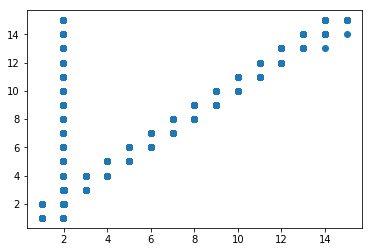

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
def conv(x):
    return x.replace('+-', '-').encode()

k = np.genfromtxt((conv(x) for x in open("./k.txt")),dtype=complex)
plt.plot(k[:,1]/41,k[:,0],ls="",marker="o")

/home/nnem614/Documents/anaconda3/envs/py35/lib/python3.5/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0,0.5,'k')

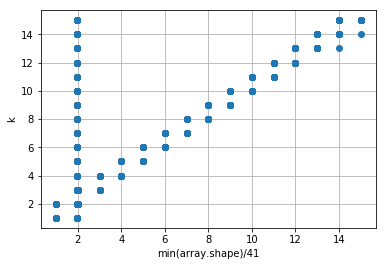

In [9]:
plt.plot(k[:,1]/41,k[:,0],ls="",marker="o")
plt.grid(True)
plt.xlabel("min(array.shape)/41")
plt.ylabel("k")

In [14]:
len(a.shape)==a.ndim
b=np.array([5,])
b.size
print(a)
print(np.einsum("ijk->ij",a))
a,b=None,None

[[[ 0.10027431]
  [ 0.61864438]
  [ 0.90004867]
  [ 0.9991721 ]
  [ 0.62443983]]]
[[ 0.10027431  0.61864438  0.90004867  0.9991721   0.62443983]]


In [23]:
lista=[np.zeros((1,5,1))]*10
lista[2]

array([[[ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.]]])

In [19]:
c = np.random.rand(5,5)
d = np.random.rand(5)

from scipy.linalg import svd
s = svd(c)
s[1]

array([ 2.75203221,  1.23596526,  0.69681136,  0.46965487,  0.01757523])

In [23]:
d4 = np.random.rand(3,4,5,6)

d3=d4.reshape(3,4,5*6)
d2 = d3.reshape(3*4,30)
#print(d2)
dims=np.array([12,30])
d1 = d4.reshape(dims)
d2==d1

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [ True,  True,  True,

In [36]:
print(np.arange(0,30))
print(np.array((np.arange(0,30)-np.arange(0,30)%5)/5,dtype=int))
print((np.arange(0,30)/5).astype(int))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4 5 5 5 5 5]
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4 5 5 5 5 5]


In [43]:
a=np.random.rand(4,3,5)
print(a)
b=np.zeros(a.shape,complex)
%timeit b[1:3,0,0]=2*a[0:2,0,0]

%timeit b[1:3,0,0]+=2*a[0:2,0,0]

[[[ 0.59996733  0.3870639   0.27129489  0.24032532  0.15160028]
  [ 0.91523141  0.43803072  0.28431341  0.20243107  0.96854814]
  [ 0.32872583  0.17052641  0.65064574  0.7853942   0.27661472]]

 [[ 0.79766917  0.35947929  0.78463312  0.23390513  0.65474452]
  [ 0.30169344  0.55329632  0.51631014  0.94432027  0.04931298]
  [ 0.74598599  0.66947354  0.47811673  0.89854222  0.30700134]]

 [[ 0.92362174  0.62325496  0.20611013  0.24306962  0.72986035]
  [ 0.62784356  0.95958975  0.79265664  0.25144865  0.56407222]
  [ 0.42395383  0.96107925  0.03234318  0.79398795  0.16037362]]

 [[ 0.43125649  0.86191912  0.62273183  0.83216351  0.96896033]
  [ 0.42561207  0.43359524  0.66758813  0.97781804  0.36644919]
  [ 0.08642409  0.86108408  0.10306032  0.80762812  0.47940297]]]
3.5 µs ± 19 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
7.69 µs ± 42 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [61]:
N_env=5
print(np.arange(1,N_env))
print(((np.linspace(0,(N_env-1)**2-1,(N_env-1)**2)/(N_env-1)).astype(int)+1)[0:(-N_env+1)])
print((np.arange(0,N_env*(N_env-1))/N_env).astype(np.int64)+1)

#%timeit ((np.arange(N_env,N_env*(N_env+1))/N_env).astype(int))

#%timeit (np.arange(0,N_env**2)/N_env).astype(int)+1

[1 2 3 4]
[1 1 1 1 2 2 2 2 3 3 3 3]
[1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4]


In [56]:
dim_tS = 11
print(np.linspace(0,int((dim_tS)/2),dim_tS).astype(np.int64))
print((np.arange(0,dim_tS)/2).astype(np.int64))

[0 0 1 1 2 2 3 3 4 4 5]
[0 0 1 1 2 2 3 3 4 4 5]


In [38]:
from math import factorial

def coherent(n,phi,dim):
    array = np.zeros(dim)
    for i in range(dim):
        array[i] = np.exp(-n/2)*(np.sqrt(n)*np.exp(phi))**i/np.sqrt(float(factorial(i)))
    return array
initenv    = np.zeros((1,7,1),complex)
initenv = coherent(.1,0,7)[np.newaxis,:,np.newaxis]
print(initenv.shape)
print(initenv)

(1, 7, 1)
[[[  9.51229425e-01]
  [  3.00805156e-01]
  [  6.72620777e-02]
  [  1.22803191e-02]
  [  1.94168893e-03]
  [  2.74596282e-04]
  [  3.54502276e-05]]]


In [40]:
initenv/np.sqrt(np.sum(initenv**2))

array([[[  9.51229425e-01],
        [  3.00805156e-01],
        [  6.72620777e-02],
        [  1.22803191e-02],
        [  1.94168893e-03],
        [  2.74596282e-04],
        [  3.54502276e-05]]])

In [47]:
a = np.random.rand(1,5,1)
print(a.size)
print(np.sum(a))
print(np.sum(a[0,:,0]))

5
2.08167392129
2.08167392129


In [50]:
dim_a,dim_initenv,dim_c = a.shape[1],initenv.shape[1],a.shape[1]
print(dim_a, dim_initenv,dim_c)

5 7 5


In [61]:
ind=2
text = None
b=a[0,:,:]
print(b.shape)

(5, 1)


In [63]:
a[0:1,2,0:1]

array([[ 0.9479183]])

In [103]:
from scipy.linalg import svd
b=np.random.rand(5)#np.array([1,0,0,0,0])#
b=b/np.sum(b)
c=np.random.rand(4)#np.array([0,0,0,1])#
c=c/np.sum(c)
d=np.tensordot(b,c,axes=0)
print(np.sum(d))
#d=d/np.sum(d)
svds=svd(d,full_matrices=False)
#print(svds)
e1=svds[0][:,:1]
e2 = np.diag(svds[1][:1])
e3 = svds[2][:1,:]
print(oe.contract("ij,jk,kl->il",e1,e2,e3))
print(d)
print(e1/b.reshape(b.size,1))
print(oe.contract("ij,jk",e2,e3)/c)

1.0
[[ 0.08496519  0.0533627   0.10238228  0.05629309]
 [ 0.01513643  0.00950649  0.01823926  0.01002853]
 [ 0.07788368  0.04891514  0.09384914  0.05160129]
 [ 0.06955452  0.04368398  0.08381257  0.04608286]
 [ 0.03853511  0.02420212  0.04643446  0.02553117]]
[[ 0.08496519  0.0533627   0.10238228  0.05629309]
 [ 0.01513643  0.00950649  0.01823926  0.01002853]
 [ 0.07788368  0.04891514  0.09384914  0.05160129]
 [ 0.06955452  0.04368398  0.08381257  0.04608286]
 [ 0.03853511  0.02420212  0.04643446  0.02553117]]
[[-2.03115684]
 [-2.03115684]
 [-2.03115684]
 [-2.03115684]
 [-2.03115684]]
[[-0.49233027 -0.49233027 -0.49233027 -0.49233027]]
